<a href="https://colab.research.google.com/github/CharlitonNogueira/capitulo-1/blob/main/prova_questao_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VARIAÇÃO DO LUCRO

In [472]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose, STL

from statsmodels.tsa.seasonal import seasonal_decompose, STL


In [473]:
#carregando arquivo csv com a lista de dados
df = pd.read_csv('/content/lucro.csv')
df.head()

,data,lucro
0,01/01/2011,11200887
1,01/04/2011,10180051
2,01/07/2011,7850044
3,01/10/2011,8188875
4,01/01/2012,6608470


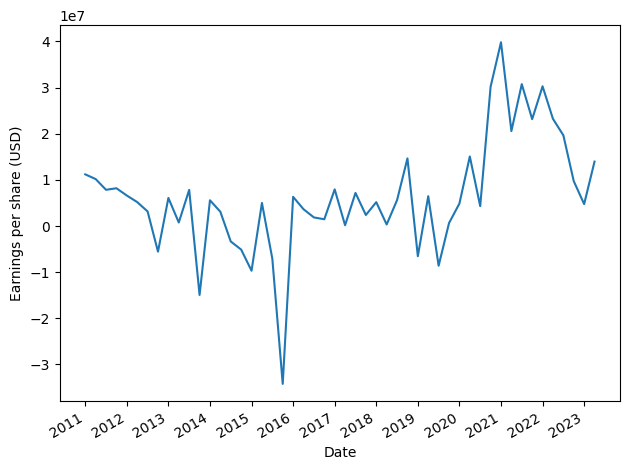

In [474]:
#plotando figura e grafico com os valores do lucro e data
fig, ax = plt.subplots()

ax.plot(df.data, df.lucro)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, 52, 4), [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

fig.autofmt_xdate()
plt.tight_layout()


In [475]:
#decompondo a serie em 4 periodos: Observed, Trend, Seasonal e Residuals
advanced_decomposition = STL(df.lucro, period=4).fit()

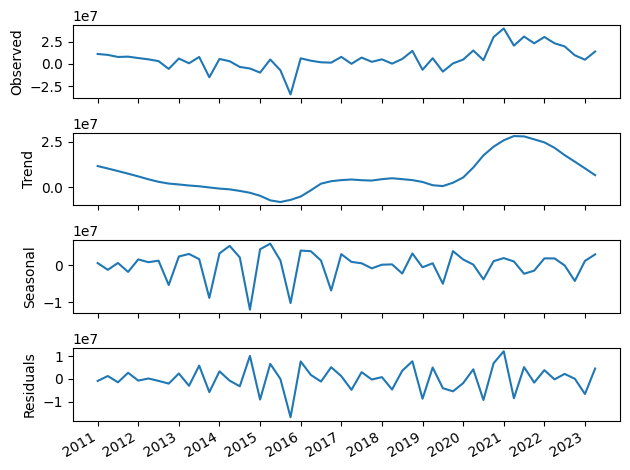

In [476]:
#plotando figura com os dados dos 4 periodos separados cada uma em sua figura
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

#grafico 1
ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

#grafico 2
ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

#grafico 3
ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

#grafico 4
ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


plt.xticks(np.arange(0, 52, 4), [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

fig.autofmt_xdate()
plt.tight_layout()


PASSEIO ALEATORIO LUCRO

In [477]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [478]:
LUCRO_ADF_result = adfuller(df['lucro'])

print(f'ADF Statistic: {LUCRO_ADF_result[0]}')
print(f'p-value: {LUCRO_ADF_result[1]}')

ADF Statistic: -1.7169921437771516
p-value: 0.42237956186380254


In [479]:
diff_close = np.diff(df['lucro'], n=1)

In [480]:
LUCRO_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {LUCRO_diff_ADF_result[0]}')
print(f'p-value: {LUCRO_diff_ADF_result[1]}')

ADF Statistic: -7.7844937312762665
p-value: 8.248838037708276e-12


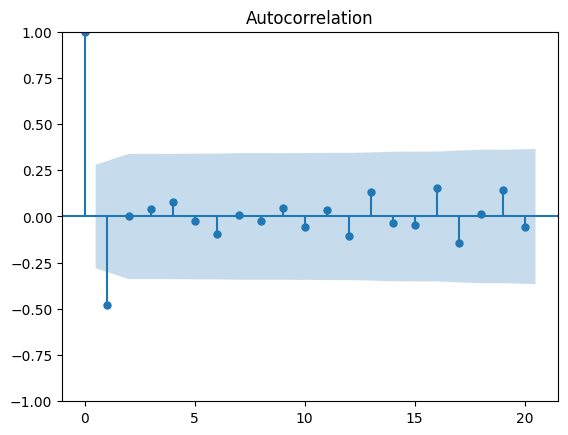

In [481]:
plot_acf(diff_close, lags=20);

A Série de lucros da Vale é um passeio aleatório, pois o valor-p é menor que 0,05 e o ADF é negativo: (ADF Statistic: -7.7844937312762665
p-value: 8.248838037708276e-12). O passeio aleatório das outras séries já foram respondidas nas questões 1 e 2.

CALCULANDO O MAPE DO LUCRO DA VALE

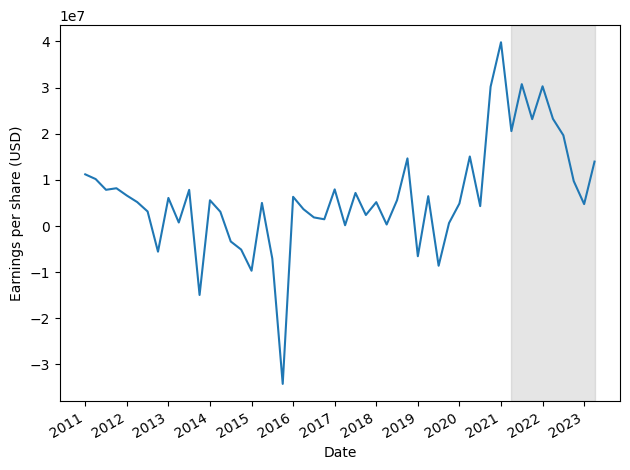

In [482]:
#PLOTANDO O GRAFICO E A FIGURA NO PYTHON
fig, ax = plt.subplots()

ax.plot(df.data, df.lucro)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

ax.axvspan(41, 49, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 52, 4), [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

fig.autofmt_xdate()
plt.tight_layout()

In [483]:
#ATRIBUINDO VALORES A CONJUNTOS DE DADOS CRIADOS COM NOME DE DADO E TESTE A PARTIR DA LISTA
#DE DADOS DAS ACOES DA VALE ONDE TREINO É COMPOSTO PELOS DADOS QUE VÃO ATE A LINHA 200 E O
#CONJUNTO TESTE DE 200 ATE O ÚLTIMO VALOR DA LISTA
treino = df[:-8]
teste = df[-8:]


In [484]:
#TIRANDO A MEDIA DOS VALORES DO CONJUNTO TREINO
media_historica = np.mean(treino['lucro'])
media_historica

3912334.595238095

In [485]:
#CRIANDO UMA NOVA COLUNA COM O VALOR DA MEDIA DO CONJUNTO TREINO
teste.loc[:, 'media_previsao'] = media_historica

teste

,data,lucro,media_previsao
42,01/10/2021,30747956,3.912335e+06
43,01/01/2022,23163000,3.912335e+06
44,01/04/2022,30285000,3.912335e+06
45,01/07/2022,23228000,3.912335e+06
46,01/10/2022,19661000,3.912335e+06
47,01/01/2023,9734000,3.912335e+06
48,01/04/2023,4752000,3.912335e+06
49,01/07/2023,13966000,3.912335e+06


In [486]:
#CALCULO MATEMATICO PARA ENCONTRAR A MÉDIA ARITMETICA DA MEDIA REAL E DA MEDIA PREVISTA
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [487]:
#FUNCAO PARA CALCULAR O MAPE QUE UTILIZA COMO PARAMETRO OS DADOS DO CONJUNTO TESTE E A MEDIA PREVISTA
mape_media_historica = mape(teste['lucro'], teste['media_previsao'])
mape_media_historica

71.27363922740757

In [488]:
#TECNICA INGÊNUA DE PREVISAO QUE UTILIZA APENAS OS DADOS DO ÚLTIMO ANO
media_ultimo_ano = np.mean(treino['lucro'][-8:])
media_ultimo_ano

13360792.75

In [489]:
#CRIA UMA NOVA COLUNA COM OS DADOS DA MEDIA DO ULTIMO ANO
teste.loc[:, 'previsao_media_2022'] = media_ultimo_ano

teste

,data,lucro,media_previsao,previsao_media_2022
42,01/10/2021,30747956,3.912335e+06,13360792.75
43,01/01/2022,23163000,3.912335e+06,13360792.75
44,01/04/2022,30285000,3.912335e+06,13360792.75
45,01/07/2022,23228000,3.912335e+06,13360792.75
46,01/10/2022,19661000,3.912335e+06,13360792.75
47,01/01/2023,9734000,3.912335e+06,13360792.75
48,01/04/2023,4752000,3.912335e+06,13360792.75
49,01/07/2023,13966000,3.912335e+06,13360792.75


In [490]:
#FUNCAO PARA CALCULAR O MAPE QUE UTILIZA COMO PARAMETRO OS DADOS DO CONJUNTO TESTE E A MEDIA PREVISTA DO ULTIMO ANO
mape_media_ultimo_ano = mape(teste['lucro'], teste['previsao_media_2022'])
mape_media_ultimo_ano

56.50334918613805

In [491]:
#TECNICA INGÊNUA DE PREVISAO UTILIZANDO APENAS O ÚLTIMO VALOR DO CONJUNTO TREINO
last = treino['lucro'].iloc[-1]
last

20574181

In [492]:
#CRIAR COLUNA COM OS DADOS DO CONJUNTO TREINO
teste.loc[:, 'ultima_previsao'] = last

teste

,data,lucro,media_previsao,previsao_media_2022,ultima_previsao
42,01/10/2021,30747956,3.912335e+06,13360792.75,20574181
43,01/01/2022,23163000,3.912335e+06,13360792.75,20574181
44,01/04/2022,30285000,3.912335e+06,13360792.75,20574181
45,01/07/2022,23228000,3.912335e+06,13360792.75,20574181
46,01/10/2022,19661000,3.912335e+06,13360792.75,20574181
47,01/01/2023,9734000,3.912335e+06,13360792.75,20574181
48,01/04/2023,4752000,3.912335e+06,13360792.75,20574181
49,01/07/2023,13966000,3.912335e+06,13360792.75,20574181


In [493]:
#FUNCAO PARA CALCULAR O MAPE QUE UTILIZA COMO PARAMETRO OS DADOS DO CONJUNTO TESTE E A MEDIA PREVISTA
mape_ultima = mape(teste['lucro'], teste['ultima_previsao'])
mape_ultima

73.00466569411387

In [494]:
#CRIANDO COLUNA  COM O INDICE PREVISAO SAZONAL PARA UMA ANALISE INGÊNUA SAZONAL
teste.loc[:, 'previsao_sazonal'] = treino['lucro'][-8:].values

teste

,data,lucro,media_previsao,previsao_media_2022,ultima_previsao,previsao_sazonal
42,01/10/2021,30747956,3.912335e+06,13360792.75,20574181,-8611702
43,01/01/2022,23163000,3.912335e+06,13360792.75,20574181,636943
44,01/04/2022,30285000,3.912335e+06,13360792.75,20574181,4877111
45,01/07/2022,23228000,3.912335e+06,13360792.75,20574181,15072230
46,01/10/2022,19661000,3.912335e+06,13360792.75,20574181,4316716
47,01/01/2023,9734000,3.912335e+06,13360792.75,20574181,30188979
48,01/04/2023,4752000,3.912335e+06,13360792.75,20574181,39831884
49,01/07/2023,13966000,3.912335e+06,13360792.75,20574181,20574181


In [495]:
##FUNCAO PARA CALCULAR O MAPE QUE UTILIZA COMO PARAMETRO OS DADOS DO CONJUNTO TESTE E A MEDIA PREVISTA
mape_previsao_sazonal = mape(teste['lucro'], teste['previsao_sazonal'])
mape_previsao_sazonal

177.24729319652351

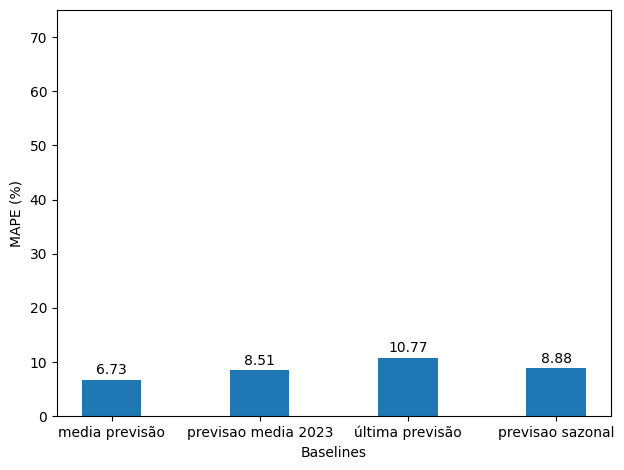

In [496]:
#PLOTANDO TODOS OS GRAFICOS COM OS VALORES OBTIDOS ATRAVEZ DAS TECNICAS INGÊNUAS UTILIZADAS
fig, ax = plt.subplots()

x = ['media previsão', 'previsao media 2023', 'última previsão', 'previsao sazonal']
y = [6.73, 8.51, 10.77, 8.88]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

O menor MAPE é o 6.73, referente a primeira tecnica ingênua utilizada onde todos os dados do conjunto treino é utilizado na lista.

VARIAÇÃO ACOES VALE

In [497]:
#carregando arquivo csv com a lista de dados
df = pd.read_csv('/content/acoesvale.csv')
df.head()

,data,abertura,maximo,minimo,fechamento,acoes,volume
0,2022-12-19,15.930000,16.129999,15.850000,16.100000,14.814281,20805200
1,2022-12-20,16.440001,16.690001,16.389999,16.440001,15.127129,16416900
2,2022-12-21,16.510000,16.740000,16.430000,16.590000,15.265149,27809300
3,2022-12-22,16.530001,16.610001,16.299999,16.540001,15.219142,17452500
4,2022-12-23,16.510000,16.790001,16.500000,16.690001,15.357162,13416000


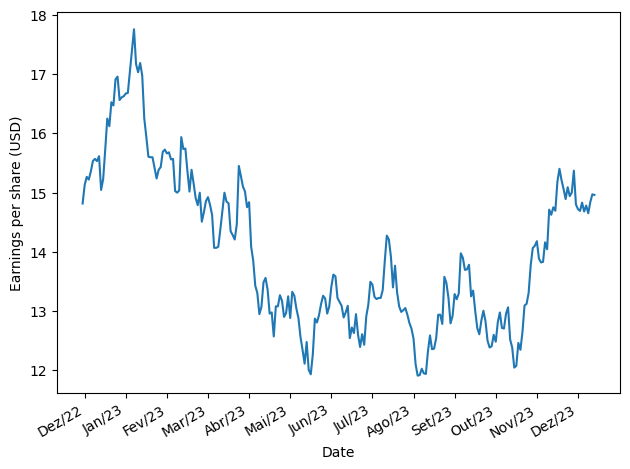

In [498]:
#plotando figura e grafico com os valores do lucro e data
fig, ax = plt.subplots()

ax.plot(df.data, df.acoes)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(1, 261, 20), ['Dez/22', 'Jan/23', 'Fev/23', 'Mar/23', 'Abr/23', 'Mai/23', 'Jun/23', 'Jul/23', 'Ago/23', 'Set/23', 'Out/23', 'Nov/23', 'Dez/23'])

fig.autofmt_xdate()
plt.tight_layout()

In [499]:
#decompondo a serie em 4 periodos: Observed, Trend, Seasonal e Residuals
advanced_decomposition = STL(df.acoes, period=4).fit()

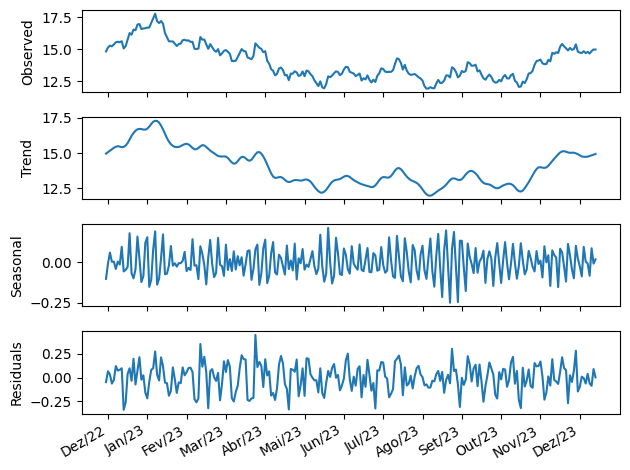

In [500]:
#plotando figura com os dados dos 4 periodos separados cada uma em sua figura
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

#grafico 1
ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

#grafico 2
ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

#grafico 3
ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

#grafico 4
ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


plt.xticks(np.arange(1, 261, 20), ['Dez/22', 'Jan/23', 'Fev/23', 'Mar/23', 'Abr/23', 'Mai/23', 'Jun/23', 'Jul/23', 'Ago/23', 'Set/23', 'Out/23', 'Nov/23', 'Dez/23'])

fig.autofmt_xdate()
plt.tight_layout()

VARIAÇÃO INDICES IPAM


In [501]:
#carregando arquivo csv com a lista de dados
df = pd.read_csv('/content/indice_ipam.csv')
df.head()

,data,ipa_m
0,jan/11,0.60
1,fev/11,1.07
2,mar/11,0.68
3,abr/11,0.51
4,mai/11,0.40


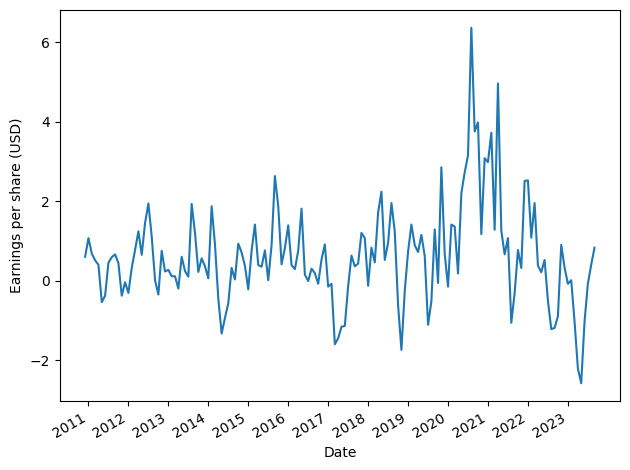

In [502]:
#plotando figura e grafico com os valores do lucro e data
fig, ax = plt.subplots()

ax.plot(df.data, df.ipa_m)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(1, 156, 12), [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

fig.autofmt_xdate()
plt.tight_layout()

In [503]:
#decompondo a serie em 4 periodos: Observed, Trend, Seasonal e Residuals
advanced_decomposition = STL(df.ipa_m, period=4).fit()

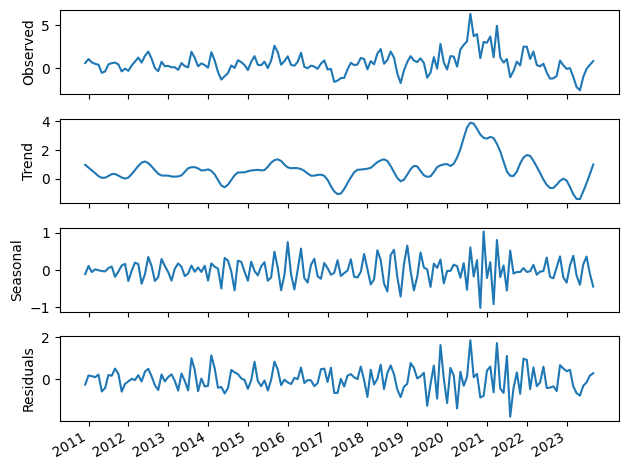

In [504]:
#plotando figura com os dados dos 4 periodos separados cada uma em sua figura
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

#grafico 1
ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

#grafico 2
ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

#grafico 3
ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

#grafico 4
ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


plt.xticks(np.arange(1, 156, 12), [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

fig.autofmt_xdate()
plt.tight_layout()